In [46]:
import numpy as np
import pandas as pd


In [47]:
params = {
    0: [2/3, 1, None],
    0.01 : [0.62249, 1.04424, 29998.33326],
    0.05 : [0.49984, 1.16865, 1198.33150],
    0.1 : [0.39214, 1.28218, 298.32566],
    0.5 : [-0.09455, 2.11973, 9.97485],

}


df = pd.DataFrame()
df['eps'] = params.keys()
df['x1'], df['x2'], df['x3'] = (t for t in zip(*params.values()))
# df['x3'], df['x1'], df['x2'] = (t for t in zip(*params.values()))

In [48]:
def x1_asympt(eps, max_parts=3):
    parts = [2/3, eps*(-5), np.square(eps)*2017/27]

    return sum(parts[:max_parts])
def x2_asympt(eps, max_parts=3):
    parts = [1, eps*5, np.square(eps)*(-74)]

    return sum(parts[:max_parts])
def x3_asympt(eps, max_parts=3):
    parts = [3*np.power(eps, -1 * 2), -5/3, -19/27*np.power(eps, 2)]
    
    return round(sum(parts[:max_parts]), 3)


# Арина
def x1_asympt(eps, max_parts=3):
    parts = [-7/2 * eps, np.power(eps, 2)*(-21 - 7/8), -175*np.power(eps, 3)]

    return sum(parts[:max_parts])

def x2_asympt(eps, max_parts=3):
    parts = [-2, 1/2 *eps, np.square(eps)*(55/8)]

    return sum(parts[:max_parts])

def x3_asympt(eps, max_parts=3):
    parts = [-1/3*np.power(eps, -1), 2, 3*eps]
    
    return round(sum(parts[:max_parts]), 3)

parts = 2

df['x1^'] = x1_asympt(df['eps'], parts)
df['x2^'] = x2_asympt(df['eps'], parts)
df['x3^'] = x3_asympt(df['eps'], parts)


df['error1'] = np.round(np.abs((df['x1^'] - df['x1']) / df['x1'] * 100), 3)
df['error2'] = np.round(np.abs((df['x2^'] - df['x2']) / df['x2'] * 100), 3)
df['error3'] = np.round(np.abs((df['x3^'] - df['x3']) / df['x3'] * 100), 3)

df

,eps,x1,x2,x3,x1^,x2^,x3^,error1,error2,error3
0,0.00,0.00000,-2.00000,NaN,0.000000,-2.000,-inf,NaN,0.000,NaN
1,0.01,-0.03737,-1.99420,-31.30174,-0.037188,-1.995,-31.333,0.488,0.040,0.100
2,0.05,-0.27138,-1.92203,-4.47324,-0.229688,-1.975,-4.667,15.363,2.756,4.332
3,0.10,-2.12435,NaN,NaN,-0.568750,-1.950,-1.333,73.227,NaN,NaN
4,0.50,-2.04222,NaN,NaN,-7.218750,-1.750,1.333,253.476,NaN,NaN


Text(0.5, 0, 'ε')

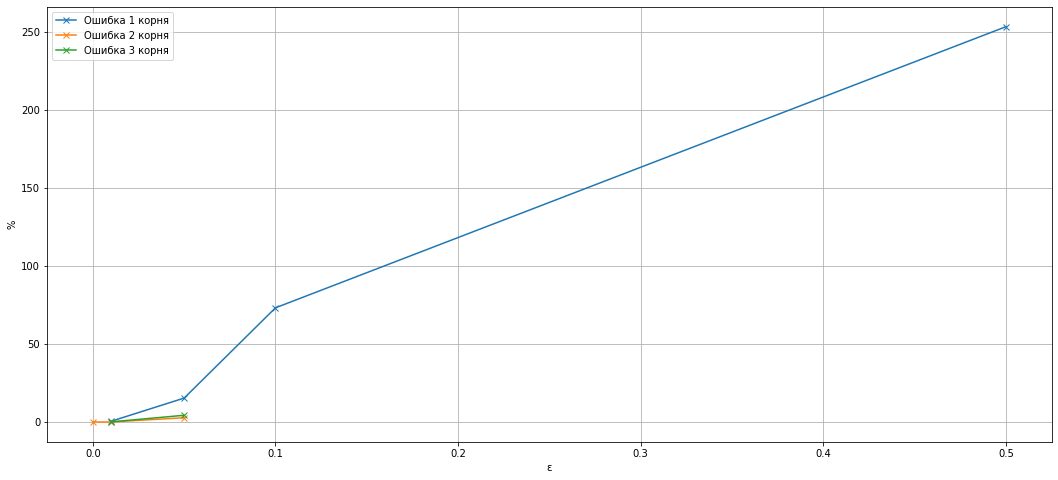

In [49]:
table = df.loc[: , ['eps', 'error1', 'error2', 'error3']]
table = table.rename(columns={'error1': 'Ошибка 1 корня', 'error2': 'Ошибка 2 корня', 'error3': 'Ошибка 3 корня', })
ax = table.set_index('eps').plot(grid=True, marker='x', figsize=(18,8))
ax.set_ylabel('%')
ax.set_xlabel('ε')

Text(0.5, 0, 'ε')

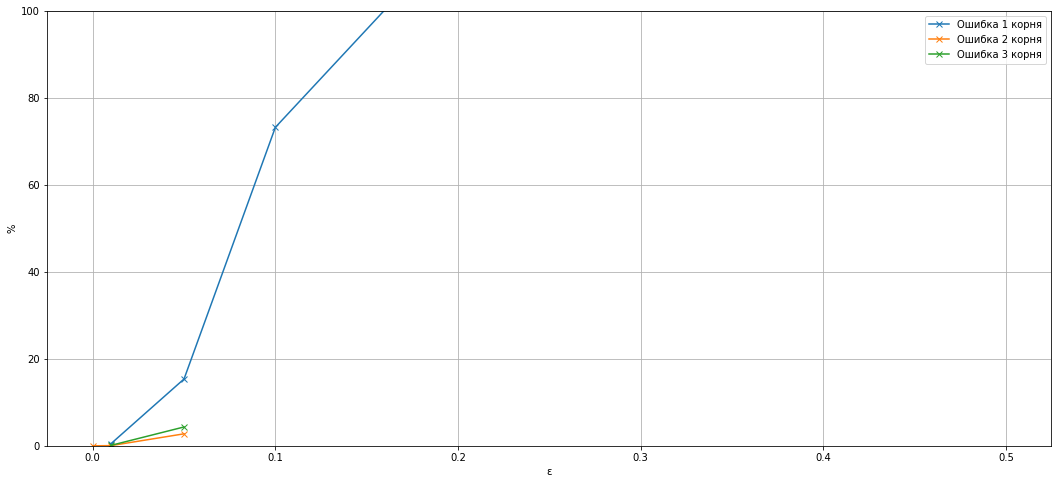

In [50]:
ax = table.set_index('eps').plot(grid=True, marker='x', figsize=(18,8), ylim=(0, 100))
ax.set_ylabel('%')
ax.set_xlabel('ε')